<a href="https://colab.research.google.com/github/ducsuibot/hiura-mihate/blob/main/Gradient%20descent%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# Load the data
file_excel='similar_data_1000.csv'
df = pd.read_csv(file_excel, header=None)
data= df.iloc[:, :3].values.astype(float) # .values để chuyển DataFrame sang NumPy array

Data gồm 1000 tập training : x = (diện tích, số phòng) và label = (giá nhà)

In [3]:
# Chia cột 0 (diện tích) và cột 2 (giá) cho 1000
data[:, 0] = data[:, 0]/1000  # diện tích nhỏ hơn
data[:, 2] = data[:, 2]/ 1000  # giá nhà nhỏ hơn
print(data[:5])

[[  0.81    1.    163.248]
 [  0.882   2.    165.87 ]
 [  2.215   2.    302.039]
 [  1.267   2.    276.53 ]
 [  1.276   1.    293.05 ]]


In [4]:
# Extract features (diện tích, số phòng ngủ) and target (giá nhà)
x_train = data[:, :2]   # 2 cột đầu
y_train = data[:, 2]    # cột cuối

In [5]:
m = x_train.shape[0]
print(m)

1000


In [6]:
# Hàm tính chi phí (cost function)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        cost += (f_wb - y[i]) ** 2
    return cost / (2 * m)

In [7]:
# Hàm tính gradient
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        err = f_wb - y[i]
        dj_dw += err * x[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [8]:
# Hàm gradient descent
def gradient_descent(x, y, alpha, num_iters, cost_function, compute_gradient):
    # Khởi tạo tham số
    w = np.zeros(x_train.shape[1])  # Vector 2 phần tử [0.0, 0.0]
    b = 0.0

    J_history = []


    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw


        J_history.append(cost_function(x, y, w , b))


        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db} ",
                  f"w: {w}, b: {b}")

    return w, b, J_history


In [9]:
# Cấu hình gradient descent
iterations = 10000
alpha = 0.01

In [10]:
# Chạy gradient descent
w_final, b_final, J_hist= gradient_descent(x_train, y_train,alpha, iterations,compute_cost, compute_gradient)

Iteration 0: Cost 49182.507213330355  dj_dw: [-739.55934277 -941.790807  ], dj_db: -333.9223569999999  w: [7.39559343 9.41790807], b: 3.3392235699999993
Iteration 1000: Cost 2719.3434056136866  dj_dw: [-0.19757591  0.8755678 ], dj_db: -2.160152536614666  w: [134.38107353   2.76206309], b: 58.86580878778628
Iteration 2000: Cost 2693.748600634047  dj_dw: [0.15845019 0.21627302], dj_db: -0.9772905720950132  w: [133.16832159  -1.40637131], b: 73.76016353207474
Iteration 3000: Cost 2688.5924204816515  dj_dw: [0.07576582 0.09540514], dj_db: -0.4436784695603924  w: [132.03340636  -2.87222677], b: 80.51457969351378
Iteration 4000: Cost 2687.529473417491  dj_dw: [0.03445987 0.04327509], dj_db: -0.20144855977256668  w: [131.50910542  -3.53121496], b: 83.58125208063562
Iteration 5000: Cost 2687.3103408927345  dj_dw: [0.01564719 0.01964812], dj_db: -0.0914664272302827  w: [131.27091128  -3.83032311], b: 84.97365325286789
Iteration 6000: Cost 2687.2651654870187  dj_dw: [0.00710452 0.00892109], dj_d

In [11]:
# In kết quả cuối cùng
print(f"\n(w,b) found by gradient descent: ({w_final}, {b_final:.4f})")


(w,b) found by gradient descent: ([131.07663926  -4.07426908], 86.1093)


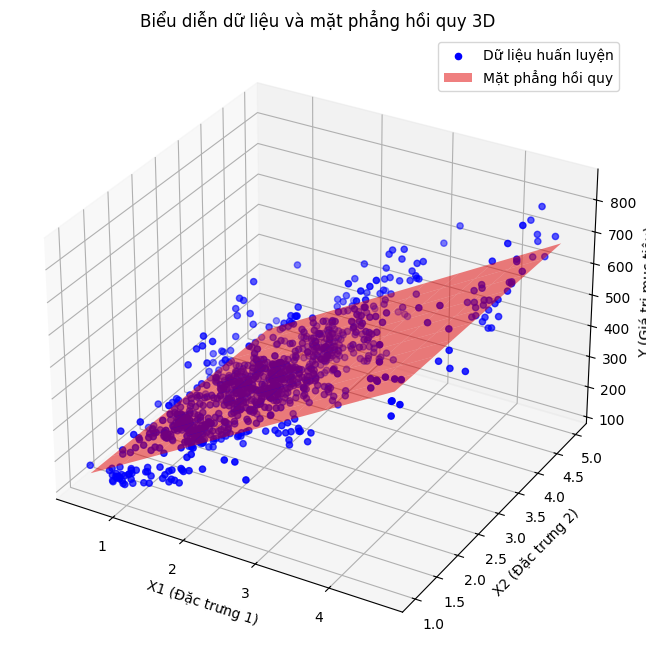

In [12]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points (x1, x2, y)
# x_train[:, 0] are the first features (x1)
# x_train[:, 1] are the second features (x2)
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='blue', marker='o', label='Dữ liệu huấn luyện')

# Create a meshgrid for the regression plane
# We need a range for x1 and x2 to plot the plane
x1_min, x1_max = x_train[:, 0].min(), x_train[:, 0].max()
x2_min, x2_max = x_train[:, 1].min(), x_train[:, 1].max()
# Create 2D arrays for x1 and x2 values
x1_surf = np.linspace(x1_min, x1_max, 10)
x2_surf = np.linspace(x2_min, x2_max, 10)
X1_mesh, X2_mesh = np.meshgrid(x1_surf, x2_surf)

# Calculate the predicted y values for the regression plane
# The linear regression equation is y_pred = w1*x1 + w2*x2 + b
Y_pred_plane = w_final[0] * X1_mesh + w_final[1] * X2_mesh + b_final

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_plane, alpha=0.5, color='red', label='Mặt phẳng hồi quy')

# Set labels for axes
ax.set_xlabel('X1 (Đặc trưng 1)')
ax.set_ylabel('X2 (Đặc trưng 2)')
ax.set_zlabel('Y (Giá trị mục tiêu)')
ax.set_title('Biểu diễn dữ liệu và mặt phẳng hồi quy 3D')
ax.legend()
plt.show()

In [13]:
# Dự đoán cho 10 dòng đầu tiên
print("Dự đoán cho 10 dòng đầu tiên:")
for i in range(10): # Lặp qua 10 dòng đầu tiên
    example = x_train[i]
    actual_y = y_train[i]

    # Tính toán dự đoán
    prediction = np.dot(w_final, example) + b_final

    # In ra kết quả
    print(f"Dự đoán giá nhà cho x = {example} : {prediction:.2f} USD (thực tế: {actual_y:.2f} USD)")

Dự đoán cho 10 dòng đầu tiên:
Dự đoán giá nhà cho x = [0.81 1.  ] : 188.21 USD (thực tế: 163.25 USD)
Dự đoán giá nhà cho x = [0.882 2.   ] : 193.57 USD (thực tế: 165.87 USD)
Dự đoán giá nhà cho x = [2.215 2.   ] : 368.30 USD (thực tế: 302.04 USD)
Dự đoán giá nhà cho x = [1.267 2.   ] : 244.03 USD (thực tế: 276.53 USD)
Dự đoán giá nhà cho x = [1.276 1.   ] : 249.29 USD (thực tế: 293.05 USD)
Dự đoán giá nhà cho x = [1.71 2.  ] : 302.10 USD (thực tế: 245.88 USD)
Dự đoán giá nhà cho x = [2.163 2.   ] : 361.48 USD (thực tế: 406.50 USD)
Dự đoán giá nhà cho x = [1.997 3.   ] : 335.65 USD (thực tế: 304.57 USD)
Dự đoán giá nhà cho x = [1.798 3.   ] : 309.56 USD (thực tế: 309.51 USD)
Dự đoán giá nhà cho x = [2.411 3.   ] : 389.91 USD (thực tế: 361.35 USD)


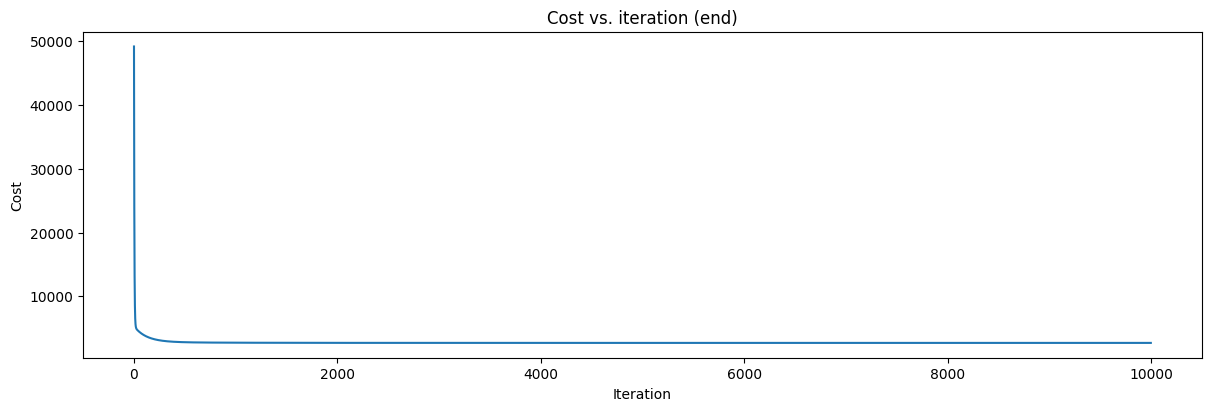

In [14]:
# Vẽ đồ thị cost theo số lần lặp
fig, ax2 = plt.subplots(constrained_layout=True, figsize=(12, 4))
ax2.plot(np.arange(len(J_hist)), J_hist)
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration')
plt.show()